Sasha Morrison, 1.11 submission

In [40]:
"""
Question 2.2 incomplete
"""

class Queue(list):
    def add(node):
        self.append(node)

    def remove():
        self.pop(0)

# Breadth-first Search
# traverses network, building visited list
def bfs(graph, start):
    visited = set()
    q = Queue(start) 
    while q:
        vertex = q.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            q.extend([ e for e in graph[vertex] if e not in visited ])
    return visited



# Exercise 1: Graph Making

Write a function called make_simple_graph that returns the graph object that represents the following diagram:

![](exercise2.png)

['D', 'C', 'E']

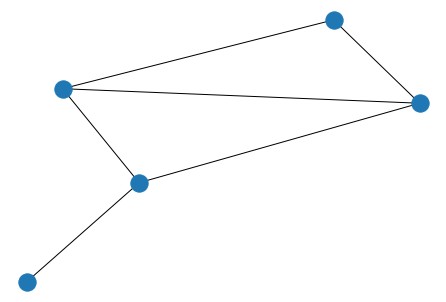

In [6]:
"""
incomplete, not a func
not red, not labelled 
"""

import networkx as nx

G = nx.Graph([('A','D'), ('A','C'), ('A','E'), ('B','D'), ('C','E'), ('D','E')], with_labels=True)
# how to make red, how to get labels
nx.draw(G)
list(G['A'])

## Exercise 1.2: computing diameter and node degrees of graphs

For the graph made by your function in the previous exercise, calculate the diameter and the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_diameter_and_degrees` which takes a networkx graph object as input, and returns a `dict` with the diameter and the degrees of all the nodes in the graph.

**NOTE:** You cannot use a networkx function or method to compute the diameter or degrees. They have to be calculated yourself

```

compute_diameter_and_degrees(G) -> {
    'diameter': 3,
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}

In [71]:

G = nx.Graph([('A','D'), ('A','C'), ('A','E'), ('B','D'), ('C','E'), ('D','E')], with_labels=True)
import itertools

def compute_diameter_and_degrees(G):
    out = dict()
    longest = []
    # build list of all node pairs
    pairs = list(itertools.combinations(G, 2))

    # calc shortest path for all pairs
    for e in pairs:
        j = nx.shortest_path(G, e[0], e[1])
        # track longest
        if len(j) > len(longest): 
            longest = j

    # diameter = longest shortest route
    diam = len(longest)
    out['diameter'] = diam

    # degrees = # of edges at each node
    for e in G:
        deg = len(G[e])
        out['degrees of '+e] = deg

    return out

compute_diameter_and_degrees(G)

{'diameter': 4,
 'degrees of A': 3,
 'degrees of D': 3,
 'degrees of C': 2,
 'degrees of E': 3,
 'degrees of B': 1}

## Exercise 1.3: An airline route map graph

CBDS Airlines has the following route map for the cities that it services, where every pair of cities has service in both directions between the cities:

```
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

```

Copy this data into a networkX graph to answer the question.

1. What is the maximum number of hops that would ever be taken by a passenger on a single trip between any two serviced cities?

2. If you were a rich jet-setter traveling everywhere in across the country and were constrained to fly CBDS, which city would be the most optimal place for you to live, to minimize the number of hops you would have to make on average as you jet from home to your latest vacation spot?


In [33]:
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), 
             ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), 
             ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), 
             ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), 
             ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), 
             ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), 
             ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), 
             ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

G = nx.Graph(routemap)
import itertools

out = []
# every combination of cities, in tuple
pairs = list(itertools.combinations(G, 2))

for e in pairs:
    chk = nx.shortest_path(G, e[0], e[1])
    if len(chk) > len(out): 
        out = chk
out

# Answer: LA <-> Albuquerque is the longest flight

['Los Angeles', 'Chicago', 'San Diego', 'Boston', 'Atlanta', 'Albuquerque']

In [72]:
G = nx.Graph(routemap)
out = []
pairs = list(itertools.combinations(G, 2))
# for every node in G
for e in G:
        sm = 0
        avg = 0
        # b is a list of all pairs 
        # in which e appears
        b = [ i for i in pairs if e in i ]
        # for each in b, sum & avg 
        # the number of hops
        for j in b:
            chk = nx.shortest_path(G, j[0], j[1])
            sm = sm + len(chk)
        # collect into list, find lowest val
        out.append(str(e) + ' ' + str(sm / len(b)))
out

# Answer:
# San Diego has the lowest avg 
# with 2.8888~ avg hops

['St. Louis 3.2777777777777777',
 'Miami 3.1666666666666665',
 'San Diego 2.888888888888889',
 'Chicago 3.2777777777777777',
 'San Francisco 3.1666666666666665',
 'Minneapolis 3.3333333333333335',
 'Boston 3.4444444444444446',
 'Portland 3.388888888888889',
 'Seattle 3.4444444444444446',
 'Tulsa 3.7222222222222223',
 'New York 3.3333333333333335',
 'Dallas 3.4444444444444446',
 'Phoenix 3.5555555555555554',
 'Cleveland 3.1666666666666665',
 'Denver 3.2222222222222223',
 'Los Angeles 3.888888888888889',
 'Philadelphia 3.7222222222222223',
 'Atlanta 3.5555555555555554',
 'Albuquerque 3.888888888888889']

# Exercise 2

Make an algorithm to generate [random walks](https://en.wikipedia.org/wiki/Random_walk) on a NetworkX graphs.

The form is `random_walk(G, nodeid, length)` so the input should be a graph, node ID and the number of steps to take in the random walk. The output is a list of node IDs in the walks

```

G = nx.binomial_graph(25, 0.3, directed=True)

# this output is random
# don't try to reproduce it exactly
random_walk(G, 3, 5) -> [3, 1, 4, 2, 3]
```


In [55]:
'''
Random walk  
at every step:  
record current node to outlist  
random int in range of connected nodes,   
step to that node  

repeat n times 
'''
import random

G = nx.Graph([('A','D'), ('A','C'), ('A','E'), ('B','D'), ('C','E'), ('D','E')], with_labels=True)

def rand_walk(G, strt, steps):
    visited = []
    q = Queue(strt)
    n = 0
    while n < steps:
        # current node = vertex
        vertex = q.pop(0)
        # add current to visited
        visited.append(vertex)
        # list of neighbours
        lis = list(G[vertex])
        # pick a rand int for next
        nex = random.randint(0, len(lis)-1)
        # add next neighbour to q
        q.extend(lis[nex])
        n += 1
    return visited
rand_walk(G, 'A', 5)

['A', 'D', 'A', 'E', 'A']

## Exercise 2.2

Modify your random walk algorithm so that:

- It takes in on a weighed graph's adjacency matrix (a numpy matrix). 

- The probability to go from node A to node B should be proportional to the weight on their edge (relative to the other edges starting at node A).

Example:
```
G = np.array([
    [0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.5, 0, 0],
])

random_walk(G, 0, 4) -> [0, 1, 0, 3]
```

Here, `node 0` would give us 50% chance to transition to `node 1` and 50% chance to transition to `node 3`.

Then `node 1` would give us 50% chance to transition to `node 0` and 50% to `node 3`, etc.

In [ ]:
'''
As above, adjusting way rand int part works to account for weight  
'''

In [76]:
import numpy as np

G = np.array([
    [0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.5, 0, 0],
])
for e in G:
    print(np.cumsum(e))
    
"""
take out zeroes, uniform rand on cumsum
retain ind info for original array position?
"""

[0.  0.5 0.5 1. ]
[0.5 0.5 0.5 1. ]
[0.25 0.5  0.75 1.  ]
[0.5 1.  1.  1. ]



# (stretch) Exercise 3: Dijkstra's Shortest Path Algorithm

Dijkstra's algorithm uses breadth first search to find the **shortest path** between two nodes in a graph.

It goes like this:

----

Let the node at which we are starting be called the initial node. Let the distance of node Y be the distance from the initial node to Y. Dijkstra's algorithm will assign some initial distance values and will try to improve them step by step.

1. Mark all nodes unvisited. Create a set of all the unvisited nodes called the unvisited set.

2. Assign to every node a tentative distance value: set it to zero for our initial node and to infinity for all other nodes. Set the initial node as current.

3. For the current node, consider all of its unvisited neighbours and calculate their tentative distances through the current node. Compare the newly calculated tentative distance to the current assigned value and assign the smaller one. For example, if the current node A is marked with a distance of 6, and the edge connecting it with a neighbour B has length 2, then the distance to B through A will be 6 + 2 = 8. If B was previously marked with a distance greater than 8 then change it to 8. Otherwise, the current value will be kept.

4. When we are done considering all of the unvisited neighbours of the current node, mark the current node as visited and remove it from the unvisited set. A visited node will never be checked again.

5. If the destination node has been marked visited (when planning a route between two specific nodes) or if the smallest tentative distance among the nodes in the unvisited set is infinity (when planning a complete traversal; occurs when there is no connection between the initial node and remaining unvisited nodes), then stop. The algorithm has finished.

6. Otherwise, select the unvisited node that is marked with the smallest tentative distance, set it as the new "current node", and go back to step 3.

----

Here is a GIF of it in action:

![](Dijkstras_progress_animation.gif)

Implement `shortest_path(G, start_node, end_node)` which takes in a networkX graph, a starting node and an end node and outputs a list of nodes which is the shortest path between the start and end.

You can use networkX's shortest path function to test your result, but not to implement it.